In [1]:
import numpy as np;import pandas as pd;

wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
'machine-learning-databases/wine/wine.data',
header=None)


In [2]:
wine.columns = ['Class_label', 'Alcohol',
'Malic acid', 'Ash',
'Alcalinity of ash', 'Magnesium',
'Total phenols', 'Flavanoids',
'Nonflavanoid phenols',
'Proanthocyanins',
'Color intensity', 'Hue',
'OD280/OD315 of diluted wines',
'Proline']

In [3]:
from sklearn.model_selection import train_test_split

X,y=wine.iloc[:,1:],wine.iloc[:,0]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0,stratify=y)


In [4]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

In [5]:
from sklearn.linear_model import LogisticRegression
modelo=LogisticRegression(penalty='l1',solver='liblinear')
modelo.fit(X_train_std,y_train)
y_predict=modelo.predict(X_test_std)


In [6]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

1.0

In [7]:
import numpy as np
modelo.coef_[1]

array([-1.53914488, -0.38537344, -0.99526158,  0.36333324, -0.05868909,
        0.        ,  0.66695517,  0.        ,  0.        , -1.93137517,
        1.23924006,  0.        , -2.23435467])

### Para valores pequeños de C se observa que los pesos de cada una de las características del conjunto de datos son cero.

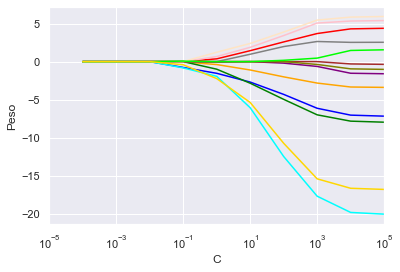

In [8]:
from weights_vs_C import weights_vs_C
weights_vs_C(X_train_std,y_train)

In [10]:
[tuple(range(10))]

[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)]

In [9]:
from sklearn.neighbors import KNeighborsClassifier
modelo=KNeighborsClassifier(n_neighbors=5)
modelo.fit(X_train_std,y_train)
y_predict=modelo.predict(X_test_std)
accuracy_score(y_test,y_predict)

0.9629629629629629

In [10]:
from sklearn.feature_selection import SelectKBest
modelo1=SelectKBest(k=3)
modelo1.fit(X_train_std,y_train)
print(modelo1.scores_)
zz=np.sort(modelo1.scores_)
wine.columns[[list(modelo1.scores_).index(i) for i in zz[-3:]]]



[ 87.40411357  22.69002937   6.54702773  20.91361329  10.24101635
  70.66790108 178.50747144  24.34892704  21.33158425  71.80556574
  72.12480378 133.85796281 169.59524926]


Index(['Hue', 'OD280/OD315 of diluted wines', 'Total phenols'], dtype='object')

# Mejores características via Random Forest

Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')
[12  6  9 11  0 10  5  4  1  8  3  7  2]


Text(0.5, 1.0, 'Orden de relevancia de las características')

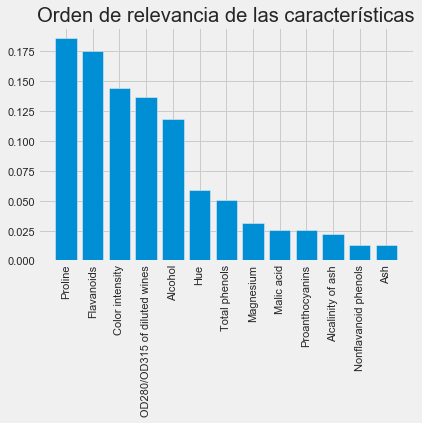

In [30]:
from sklearn.ensemble import RandomForestClassifier;import matplotlib.pyplot as plt;plt.style.use('fivethirtyeight')

modelo=RandomForestClassifier(n_estimators=500,random_state=1)
modelo.fit(X_train,y_train)
best_scores=modelo.feature_importances_
nombres=wine.columns[1:]
print(nombres)
indices_best_features=np.argsort(best_scores)[::-1]
indices_best_features
print(indices_best_features)

plt.bar(nombres[indices_best_features],best_scores[indices_best_features])
plt.xticks(np.arange(X_train.shape[1]),rotation='vertical')
plt.title('Orden de relevancia de las características')
